In [ ]:
n차원 공간에 있는 n-1차원 부분 공간
훈련 데이터를 분류하기 위해 클래스 사이의 margin을 최대화하는 초평면을 찾는다.

**17.1 선형 분류기 훈련**

SVC(서포트 벡터 분류기)를 사용하여 클래스 사이 마진을 최대화하는 초평면 가짐

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# 데이터를 로드하고 두 개의 클래스와 두 개의 특성 선택
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

In [ ]:
# 특성 표준화
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [ ]:
# 서포트 벡터 분류기 만듬
svc = LinearSVC(C=1.0)

In [ ]:
# 모델 훈련
model = svc.fit(features_standardized, target)

데이터와 초평면 그려보기

In [ ]:
from matplotlib import pyplot as plt

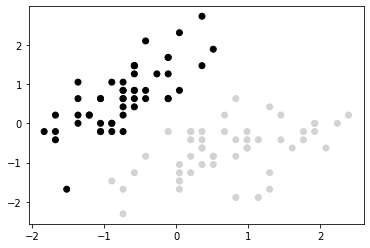

In [ ]:
# 클래스를 색으로 구분한 산점도 그리기 (클래스 0의 샘플 검정, 클래스 1의 샘플 밝은 회색)
color = ["black" if c==0 else "lightgrey" for c in target ]
plt.scatter(features_standardized[:,0],features_standardized[:,1], c=color)

In [ ]:
# 초평면 만듬
w=svc.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-2.5,2.5)
yy= a*xx -(svc.intercept_[0]) / w[1]

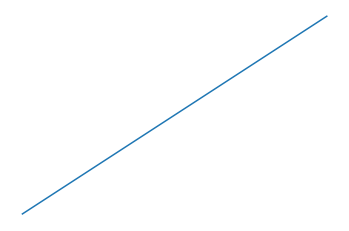

In [ ]:
# 초평면 그림
plt.plot(xx,yy)
plt.axis("off"),plt.show();

In [ ]:
# 새로운 샘플 만들기
new_observation = [[-2,3]]

In [ ]:
# 새로운 샘플 클래스 예측
svc.predict(new_observation)

array([0])

* SVC는 다중 클래스 환경에서 잘 동작
* 초평면은 선형 (곡선x)
* 일반적으로 클래스를 완벽하게 구분할 수 없기 때문에, 초평면의 마진을 최대화하는 SVC와 / 오차에 부과하는 페널티인 하이퍼파라미터 C를 가지고 분류 오타를 최소화하는 것 사이에 균형을 잡아야 한다!
* C는 SVC 모델의 매개변수
* C는 잘못 분류된 데이터 포인트에 부여하는 페널티 (C가 크면 잘못 분류된 데이터에 큰 페널티 부과)
* 사이킷런에서 C는 매개변수 C로 지정, 기본값이 1.0

**17.2  커널을 사용해 선형적으로 구분되지 않는 클래스 다루기**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# 랜덤 시드 지정
np.random.seed(0)

In [ ]:
# 두개의 특성 만듬
features = np.random.randn(200,2)

In [ ]:
# XOR 사용해 선형적으로 구분할 수 없는 클래스 만듬
target_xor = np.logical_xor(features[:,0]>0, features[:,1]>0)
target = np.where(target_xor,0,1)

In [ ]:
# 방사 기저 함수 커널을 사용한 서포트 벡터 머신 만듬
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

In [ ]:
# 분류기 훈련
model = svc.fit(features, target)

커널을 이해하기 위해 샘플 시각화

In [ ]:
# 샘플과 결정 경계를 그림
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 2차원 공간에 샘플과 결정 경계를 그리는 함수
def plot_decision_regions(X, y, classifier):
  cmap = ListedColormap(("red", "blue"))
  xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
                alpha=0.8, c=cmap.colors[idx],
                marker="+", label=cl)

In [ ]:
# 선형 커널을 사용한 서포트 벡터 분류기를 만듭니다.
svc_linear = SVC(kernel = "linear", random_state=0, C=1)

In [ ]:
# 모델을 훈련합니다.
svc_linear.fit(features, target)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

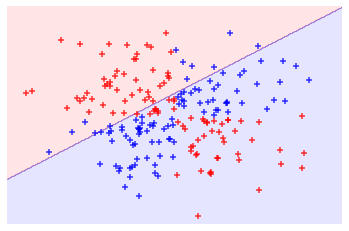

In [ ]:
# 샘플과 초평면을 그립니다
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off"), plt.show();

선형 초평면이 두 클래스를 엉터리로 나누기 때문에

선형 커널을 방사 기저 함수 커널로 바꾸고 새로운 모델 훈련

In [ ]:
# 방사 기저 함수 커널을 사용한 서포트 벡터 머신 만듬
svc= SVC(kernel="rbf", random_state=0, gamma=1, C=1)

In [ ]:
# 분류기 훈련
model=svc.fit(features,target)

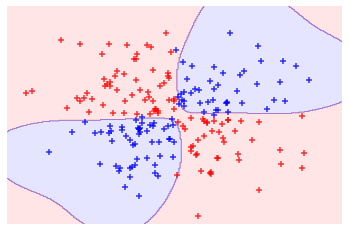

In [ ]:
# 샘플과 초평면 그림
plot_decision_regions(features, target, classifier=svc)
plt.axis("off"),plt.show();

방사 기저 함수 커널 사용 시 선형 커널보다 훨씬 잘 구분하는 결정 경계를 만들 수 있음

* 사이킷런에서 kernel 매개변수 사용해 원하는 커널 선택 가능
* 커널 선택 시 지정해야 하는 커널 옵션 - 다항 커널의 d. 방사 기저 함수 커널의 감마

**17.3 예측 확률 계산**

SVC 클래스 사용 시 probability = True 로 지정해 모델 훈련 시
predict_proba 메서드에서 보정된 확률 확인 가능

In [ ]:
iris=datasets.load_iris()
features=iris.data
target=iris.target

scaler=StandardScaler()
features_standardized = scaler.fit_transform(features)

In [ ]:
# 서포트 벡터 분류기를 만듬
svc = SVC(kernel="linear", probability=True, random_state=0)

In [ ]:
# 분류기 훈련
model = svc.fit(features_standardized, target)

In [ ]:
# 새로운 샘플 만듬
new_observation = [[.4, .4, .4, .4]]

In [ ]:
# 예측 확률 확인
model.predict_proba(new_observation)

array([[0.00623541, 0.96973799, 0.0240266 ]])

**17.4 서포트 벡터 식별하기**

In [ ]:
iris=datasets.load_iris()
features=iris.data[:100,:]
target=iris.target[:100]

scaler=StandardScaler()
features_standardized = scaler.fit_transform(features)

In [ ]:
svc=SVC(kernel ="linear", random_state=0)

In [ ]:
model=svc.fit(features_standardized, target)

In [ ]:
# 서포트 벡터 확인
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

* 초평면이 비교적 소수의 샘플에 의해 결정된다.
* 서포트 벡터는 모델에서 중요
* 서포트 벡터가 아닌 샘플을 삭제하면 모델이 변하지 않지만
 서포트 벡터를 삭제하면 초평면이 만드는 최대 마진이 달라짐

 * SVC 훈련 후 서포트 벡터 식별할 수 있는 방법

**17.5 불균형한 클래스 다루기**

In [ ]:
iris=datasets.load_iris()
features=iris.data[:100,:]
target=iris.target[:100]

In [ ]:
# 처음 40개 샘플 제거해 불균형한 클래스 만듬
features = features[40:,:]
target = target[40:]

In [ ]:
# 타깃 벡터에서 0이 아닌 클래스는 모두 1로 만듬
target = np.where((target==0),0,1)

In [ ]:
scaler=StandardScaler()
features_standardized = scaler.fit_transform(features)

In [ ]:
svc=SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)

In [ ]:
model=svc.fit(features_standardized, target)

* SVC에서 C는 샘플의 분류 오차에 대한 페널티를 결정
* SVC에서 불균형한 클래스 다루는 방법 - 클래스별로 C를 가중
* class_weight="balanced"로 지정하여 자동으로 C 값을 지정할 수 있음